# Table of Contents
 <p><div class="lev1 toc-item"><a href="#Exercise-11.1.-Naive-cross-validation-I" data-toc-modified-id="Exercise-11.1.-Naive-cross-validation-I-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Exercise 11.1. Naive cross-validation I</a></div><div class="lev1 toc-item"><a href="#Exercise-11.2.-Naive-cross-validation-II" data-toc-modified-id="Exercise-11.2.-Naive-cross-validation-II-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Exercise 11.2. Naive cross-validation II</a></div><div class="lev1 toc-item"><a href="#Exercise-11.3.-Boosting-based-cross-validation-I" data-toc-modified-id="Exercise-11.3.-Boosting-based-cross-validation-I-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Exercise 11.3. Boosting based cross-validation I</a></div><div class="lev1 toc-item"><a href="#Exercise-11.4.-Boosting-based-cross-validation-II" data-toc-modified-id="Exercise-11.4.-Boosting-based-cross-validation-II-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Exercise 11.4. Boosting based cross-validation II</a></div><div class="lev1 toc-item"><a href="#Exercise-11.5.-Regularization-based-cross-validation" data-toc-modified-id="Exercise-11.5.-Regularization-based-cross-validation-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Exercise 11.5. Regularization based cross-validation</a></div><div class="lev1 toc-item"><a href="#Exercise-11.6.-Bagging-regression-models" data-toc-modified-id="Exercise-11.6.-Bagging-regression-models-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Exercise 11.6. Bagging regression models</a></div><div class="lev1 toc-item"><a href="#Exercise-11.7.-Bagging-two-class-classification-models" data-toc-modified-id="Exercise-11.7.-Bagging-two-class-classification-models-7"><span class="toc-item-num">7&nbsp;&nbsp;</span>Exercise 11.7. Bagging two-class classification models</a></div><div class="lev1 toc-item"><a href="#Exercise-11.8.-Bagging-multi-class-classification-models" data-toc-modified-id="Exercise-11.8.-Bagging-multi-class-classification-models-8"><span class="toc-item-num">8&nbsp;&nbsp;</span>Exercise 11.8. Bagging multi-class classification models</a></div><div class="lev1 toc-item"><a href="#Exercise-11.9.-K-fold-cross-validation" data-toc-modified-id="Exercise-11.9.-K-fold-cross-validation-9"><span class="toc-item-num">9&nbsp;&nbsp;</span>Exercise 11.9. K-fold cross-validation</a></div><div class="lev1 toc-item"><a href="#Exercise-11.10.-Classification-of-diabetes" data-toc-modified-id="Exercise-11.10.-Classification-of-diabetes-10"><span class="toc-item-num">10&nbsp;&nbsp;</span>Exercise 11.10. Classification of diabetes</a></div><div class="lev1 toc-item"><a href="#Extra" data-toc-modified-id="Extra-11"><span class="toc-item-num">11&nbsp;&nbsp;</span>Extra</a></div>

In [1]:
## This code cell will not be shown in the HTML version of this notebook
# imports from custom library
import sys
sys.path.append('../')
datapath = '../mlrefined_datasets/nonlinear_superlearn_datasets/'
import autograd.numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import math
import copy

# import custom libraries and demo files
from mlrefined_libraries import nonlinear_superlearn_library as nonlib
from mlrefined_libraries import math_optimization_library as optlib

regress_plotter = nonlib.nonlinear_regression_demos_multiple_panels
classif_plotter = nonlib.nonlinear_classification_visualizer_multiple_panels

# This is needed to compensate for %matplotlib notebook's tendancy to blow up images when plotted inline
%matplotlib notebook
from matplotlib import rcParams
rcParams['figure.autolayout'] = True

# Exercise 11.1. Naive cross-validation I

Below - via a backend file - we animate the result of naive cross-validation on our regression dataset.

Moving the slider from left to right shows progressive results of increasing the capacity of our model.


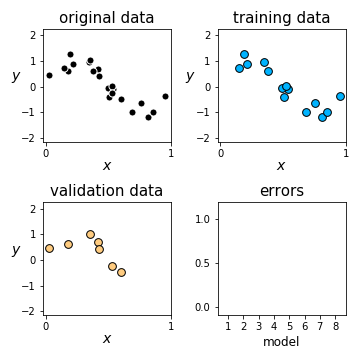
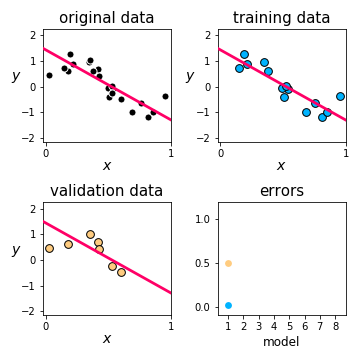
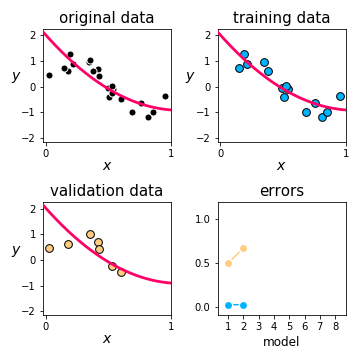
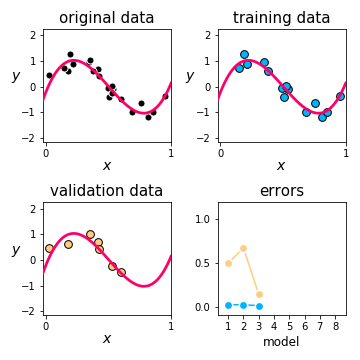
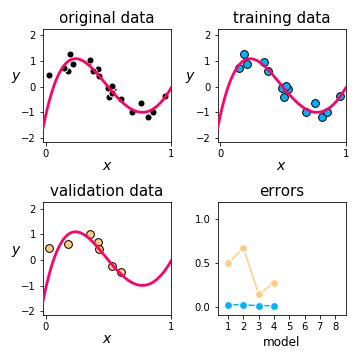
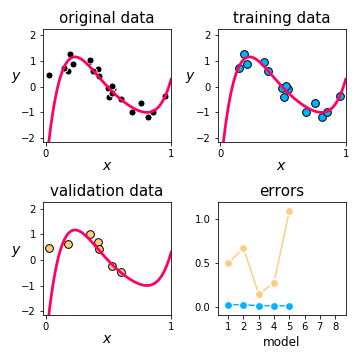
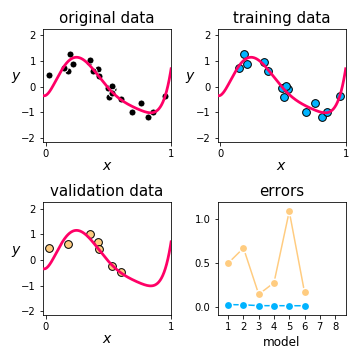
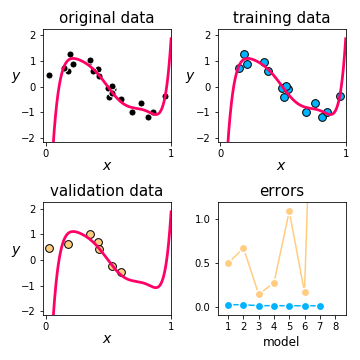
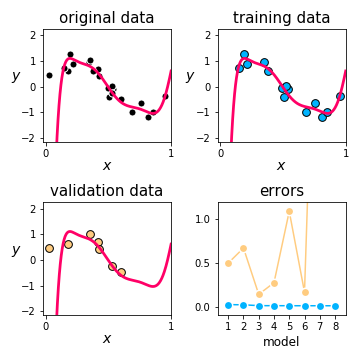

In [21]:
# run demonstration
demo = nonlib.regression_basis_single.Visualizer()
csvname = datapath + 'noisy_sin_sample.csv'
demo.load_data(csvname)s
demo.brows_single_cross_val(basis='poly',num_elements = [v for v in range(1,9)],folds = 3)

# Exercise 11.2. Naive cross-validation II

Below - via a backend file - we animate the result of naive cross-validation on our classification dataset.

Moving the slider from left to right shows progressive results of increasing the capacity of our model.

In [39]:
# load in dataset
csvname = datapath + 'new_circle_data.csv'
data = np.loadtxt(csvname,delimiter = ',')
x = data[:-1,:]
y = data[-1:,:] 

### run cross validation experiments ###
degrees = np.arange(1,8)
models_1 = []
for j in degrees:
    # import backend library
    mylib1 = nonlib.library_v2.superlearn_setup.Setup(x,y)

    # choose features
    mylib1.choose_features(name = 'polys',degree = j)
    
    # choose normalizer
    mylib1.choose_normalizer(name = 'none')

    # split into training and testing sets
    if j == 1:
        mylib.make_train_valid_split(train_portion = 0.66)
        x_train = mylib1.x_train
        y_train = mylib1.y_train
        x_valid = mylib1.x_valid
        y_valid = mylib1.y_valid
    else: # use split from first run for all further runs
        mylib1.x_train = x_train
        mylib1.y_train = y_train
        mylib1.x_valid = x_valid
        mylib1.y_valid = y_valid

    # choose cost
    mylib1.choose_cost(name = 'softmax')

    # fit an optimization
    mylib1.fit(optimizer = 'newtons_method',max_its = 5,epsilon = 10**(-8))

    # add model to list
    models_1.append(mylib1)

# load up animator
csvname = datapath + 'new_circle_data.csv'
demo2 = nonlib.crossval_classification_animator.Visualizer(csvname)

# animate based on the sample weight history
demo2.animate_crossval_classifications(models_1)

NameError: name 'mylib' is not defined

# Exercise 11.3. Boosting based cross-validation I

Below we perform boosting based cross-validation, organized into modules in a backend library.

In [ ]:
# import data
csvname = datapath + 'new_circle_data.csv'
data = np.loadtxt(csvname,delimiter = ',')
x = copy.deepcopy(data[:-1,:])
y = copy.deepcopy(data[-1:,:] )

# import booster
mylib2 = nonlib.boost_lib3.net_booster.Setup(x,y)

# choose normalizer
mylib2.choose_normalizer(name = 'standard')

# split dataset into training/validation
mylib2.make_train_valid_split(train_portion = 0.66)

# choose cost|
mylib2.choose_cost(name = 'softmax')

# choose optimizer
mylib2.choose_optimizer('RMSprop',max_its=1000,alpha_choice=10**(-1))

# run boosting
mylib2.boost(num_rounds=100,activation = 'relu')

After completing boosting we plot the training / validation cost histories below.

<IPython.core.display.Javascript object>


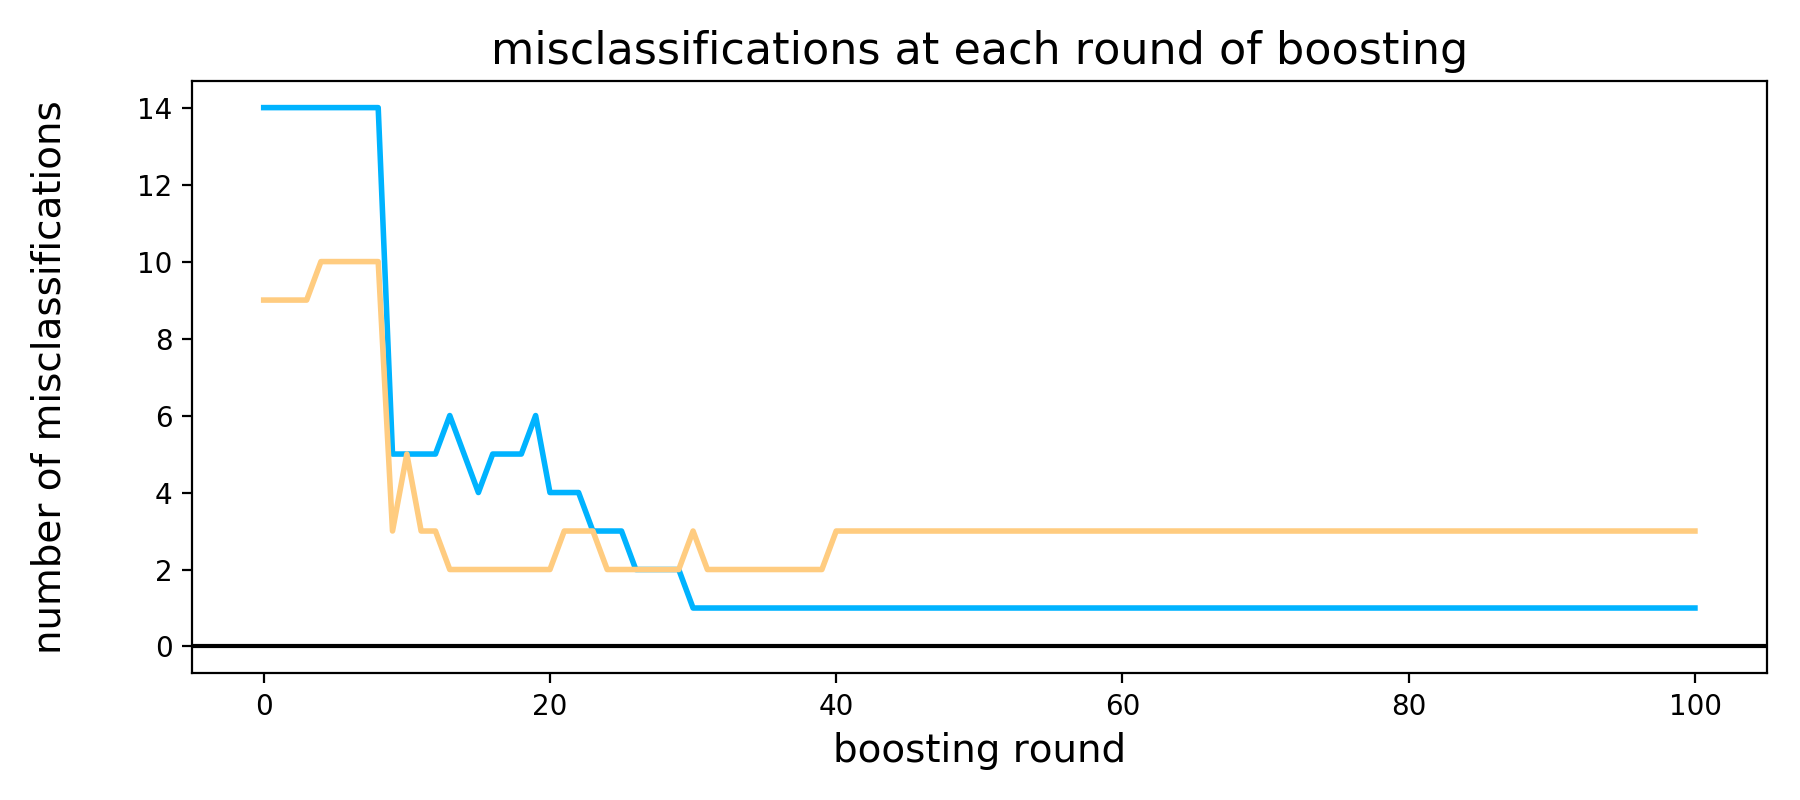

In [9]:
mylib2.plot_misclass_history()

# Exercise 11.4. Boosting based cross-validation II

Below we load in our dataset.

In [49]:
# load in original dataset
import pandas as pd

data = pd.read_csv('../mlrefined_datasets/superlearn_datasets/' + 'breast_cancer_original.txt',header = None)

# drop user id column
data.drop(0, axis=1, inplace=True)

# replace '?' missing entries with np.nan values
data.replace('?', np.nan,inplace = True)

# replace arbitrary label values with pm 1
data[10].replace([2,4],[-1,1],inplace = True)

# convert all entries to floats
data = data.astype(float)

# convert dataframe to numpy array
data = data.values

# cut into input/output pairs
x = data[:,:-1].T
y = data[:,-1:].T

Below we perform boosting using a backend library separated into distinct modules for organizational purposes.

In [ ]:
# import booster
mylib3 = nonlib.boost_lib3.net_booster.Setup(x,y)

# choose normalizer
mylib3.choose_normalizer(name = 'standard')

# split into training / validation
mylib3.make_train_valid_split(train_portion = 0.8)

# choose cost|
mylib3.choose_cost(name = 'softmax')

# choose optimizer
mylib3.choose_optimizer('RMSprop',max_its=500,alpha_choice=10**(-1))

# run boosting
mylib3.boost(num_rounds=20,activation = 'relu')

After boosting is complete we plot the training / validation cost function histories.

<IPython.core.display.Javascript object>


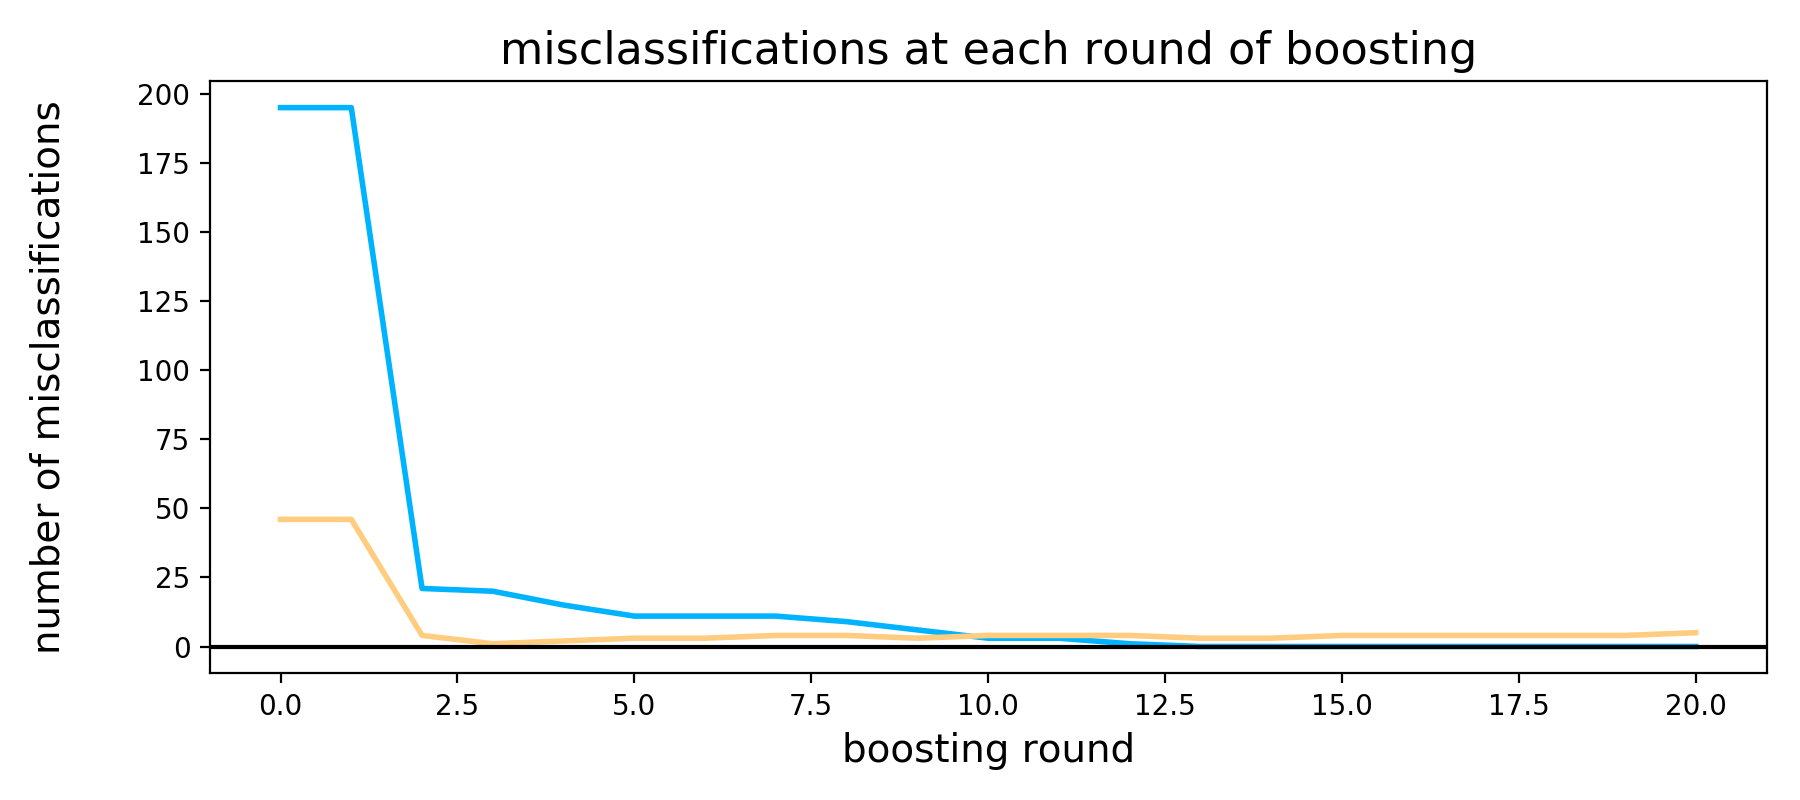

In [89]:
mylib1.plot_misclass_history()

# Exercise 11.5. Regularization based cross-validation

In [25]:
# load in dataset
csvname = datapath + 'new_circle_data.csv'
data = np.loadtxt(csvname,delimiter = ',')
x = data[:-1,:]
y = data[-1:,:] 

# start process
num_units = 15
train_portion = 0.66
lambdas = np.linspace(0.3,0,num_units)

runs = []
w = 0
for j in range(num_units):
    lam = lambdas[j]
    
    # initialize with input/output data
    mylib4 = nonlib.reg_lib.super_setup.Setup(x,y)

    # perform preprocessing step(s) - especially input normalization
    mylib4.preprocessing_steps(name = 'standard')

    # split into training and validation sets
    if j == 0:
        # make training testing split
        mylib4.make_train_val_split(train_portion = train_portion)
        train_inds = mylib4.train_inds
        valid_inds = mylib4.valid_inds
        
#         mylib2.valid_inds = valid_inds
#         mylib2.train_inds = train_inds
#         mylib2.x_train = mylib2.x[:,train_inds]
#         mylib2.y_train = mylib2.y[:,train_inds]
#         mylib2.x_valid = mylib2.x[:,valid_inds]
#         mylib2.y_valid = mylib2.y[:,valid_inds]
        
    else: # use split from first run for all further runs
        mylib4.x_train = mylib4.x[:,train_inds]
        mylib4.y_train = mylib4.y[:,train_inds]
        mylib4.x_valid = mylib4.x[:,valid_inds]
        mylib4.y_valid = mylib4.y[:,valid_inds]
        mylib4.train_inds = train_inds
        mylib4.valid_inds = valid_inds
        mylib4.train_portion = train_portion

    # choose cost
    mylib4.choose_cost(name = 'softmax')

    # choose dimensions of fully connected multilayer perceptron layers
    mylib4.choose_features(name = 'multilayer_perceptron',layer_sizes = [20],activation = 'tanh',scale = 0.1)
    
    if j == 0:
        # fit an optimization
        mylib4.fit(algo = 'RMSprop',max_its = 2000,verbose = False,lam = lam,alpha_choice = 10**(-1))
    else:
        mylib4.fit(algo = 'RMSprop',max_its = 2000,verbose = False,lam = lam,w=w,alpha_choice = 10**(-1))

    # add model to list
    runs.append(copy.deepcopy(mylib4))
    w = mylib4.w_init


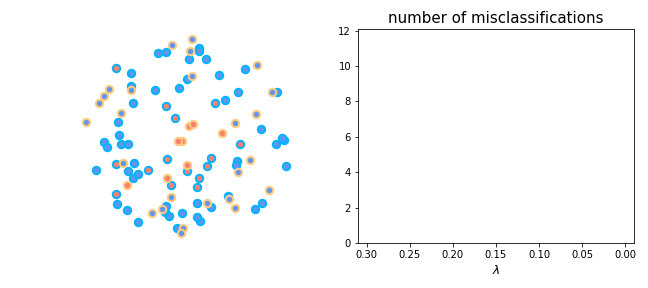
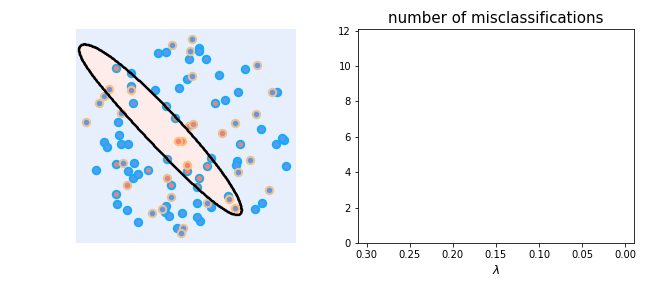
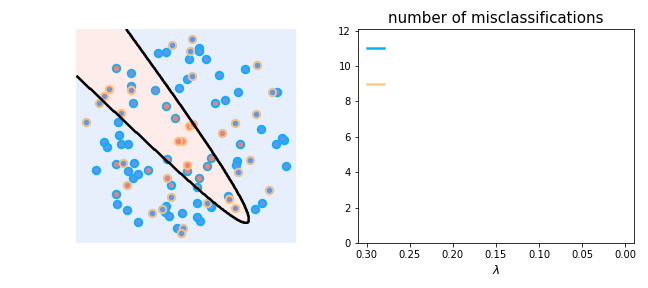
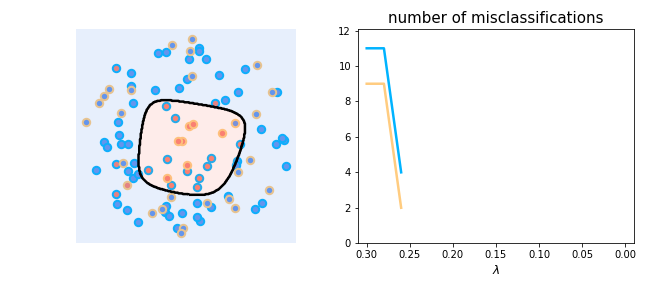
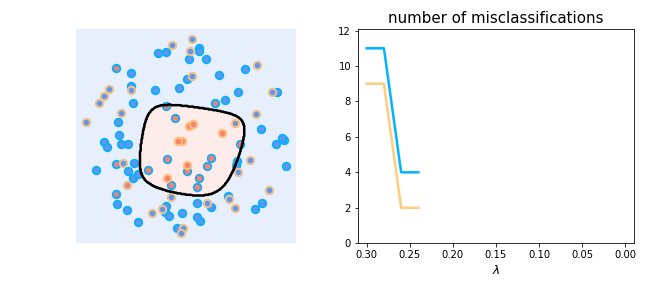
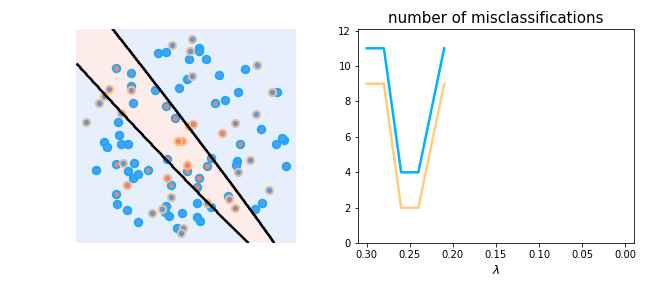
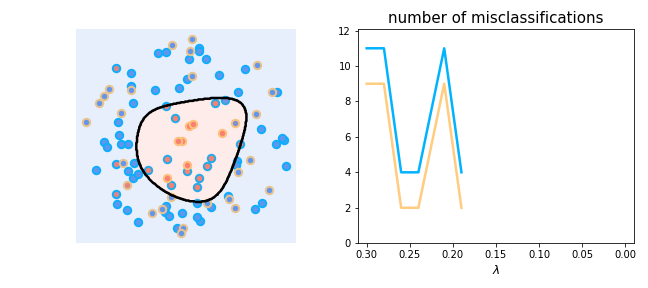
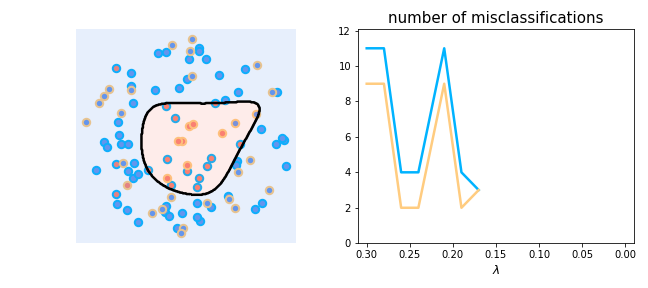
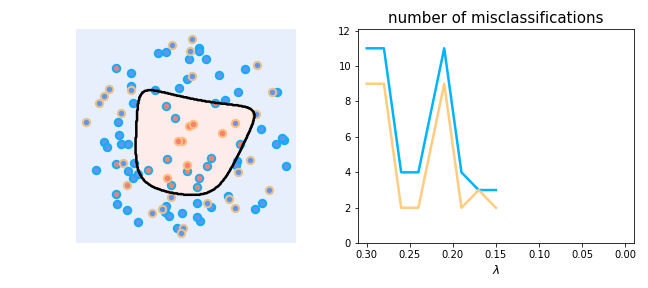
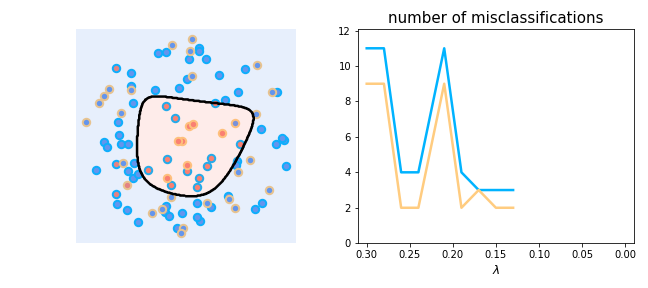
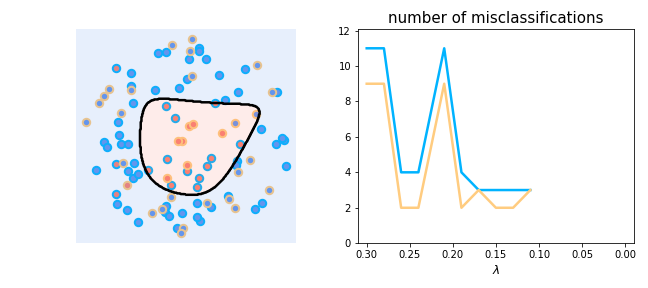
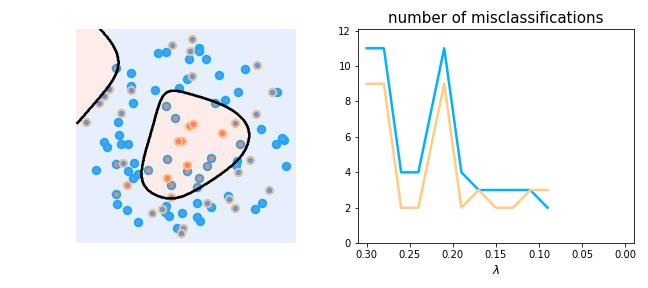
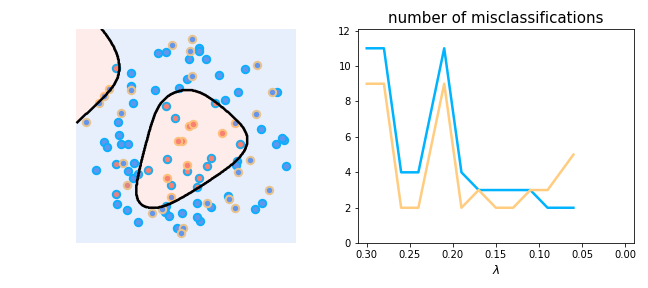
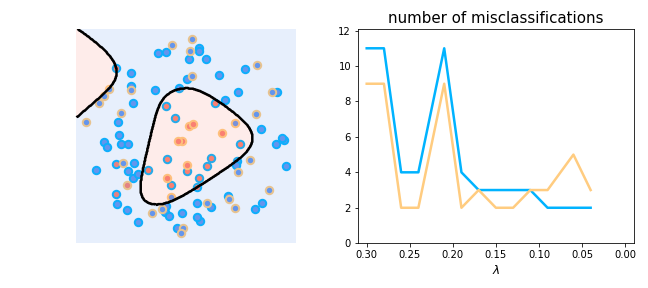
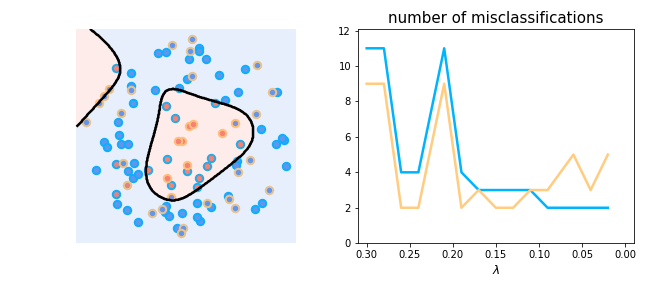
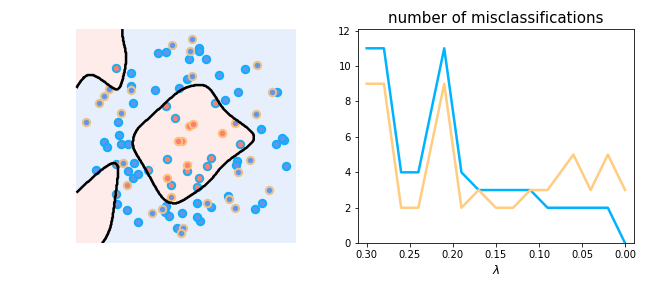

In [26]:
# animate the business
frames = 15
demo = nonlib.regularization_classification_animator.Visualizer(csvname)
demo.animate_trainval_regularization(runs,frames,num_units,show_history = True)

# Exercise 11.6. Bagging regression models

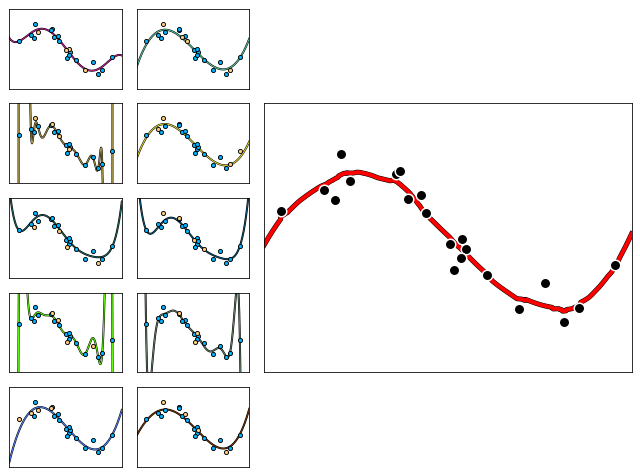

In [27]:
# This code cell will not be shown in the HTML version of this notebook
# import data
csvname_1 = datapath + 'noisy_sin_sample.csv'

data = np.loadtxt(csvname_1,delimiter = ',')
x = copy.deepcopy(data[:-1,:])
y = copy.deepcopy(data[-1:,:] )

### parameters for ensembling with regularized learner ###
train_portion = 0.8

### container for outer loop - contains best model per split ###
best_models_1 = []
num_splits = 10
top_degree = 20

### run inner loop - one split ###
for s in range(num_splits):
    #### outer loop - make a run over one split of the data ####
    runs = []
    w = 0
    for j in range(top_degree):
        # initialize with input/output data
        mylib5 = nonlib.reg_lib.super_setup.Setup(x,y)

        # perform preprocessing step(s) - especially input normalization
        mylib5.preprocessing_steps(normalizer = 'standard')

        # split into training and validation sets
        if j == 0:
            # make training testing split
            mylib5.make_train_val_split(train_portion = train_portion)
            train_inds = mylib5.train_inds
            valid_inds = mylib5.valid_inds

        else: # use split from first run for all further runs
            mylib5.x_train = mylib5.x[:,train_inds]
            mylib5.y_train = mylib5.y[:,train_inds]
            mylib5.x_valid = mylib5.x[:,valid_inds]
            mylib5.y_valid = mylib5.y[:,valid_inds]
            mylib5.train_inds = train_inds
            mylib5.valid_inds = valid_inds
            mylib5.train_portion = train_portion

        # choose cost
        mylib5.choose_cost(name = 'least_squares')

        # choose dimensions of fully connected multilayer perceptron layers
        mylib5.choose_features(name = 'polys',degree = j + 1)

        # fit an optimization
        mylib5.fit(algo = 'newtons_method',max_its = 1,verbose = False,epsilon = 10**(-10))

        # add model to list
        runs.append(copy.deepcopy(mylib5))
        
    ### keep lowest validation model from this run ###
    val_costs = [runs[i].valid_cost_histories[0][1] for i in range(top_degree)]
    min_ind = np.argmin(val_costs)
    min_val = val_costs[min_ind]
    best_model = runs[min_ind]

    # store 
    best_models_1.append(copy.deepcopy(best_model))
    
# plot each model individually, as well as the median model
demo = nonlib.regression_bagging_visualizers_v2.Visualizer(csvname_1)
demo.show_runs(best_models_1)

# Exercise 11.7. Bagging two-class classification models

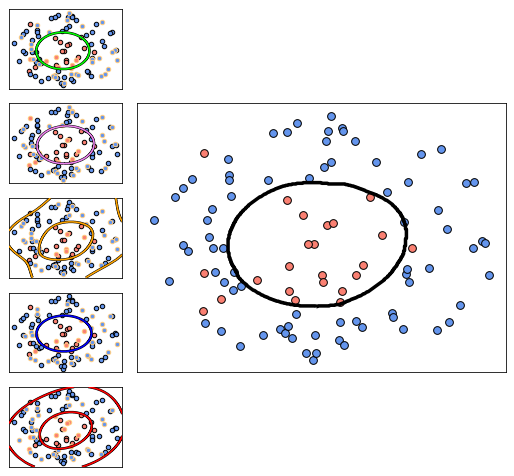

In [33]:
# This code cell will not be shown in the HTML version of this notebook
# load in dataset
csvname = datapath + 'new_circle_data.csv'

data = np.loadtxt(csvname,delimiter = ',')
x = data[:-1,:]
y = data[-1:,:] 

# run bagg
degree = 8
num_baggs = 5
train_portion = 0.66
best_models = []
runs = []
for j in range(num_baggs):
    # initialize with input/output data
    mylib6 = nonlib.reg_lib.super_setup.Setup(x,y)

    # perform preprocessing step(s) - especially input normalization
    mylib6.preprocessing_steps(normalizer = 'none')
    
    # pluck out indices of current training / validation sets
    mylib6.make_train_val_split(train_portion = train_portion)
    
    # loop over models to try
    for d in range(1,degree+1):
        # choose cost
        mylib6.choose_cost(name = 'softmax')

        # choose dimensions of fully connected multilayer perceptron layers
        mylib6.choose_features(name = 'polys',degree = d)

        # fit an optimization
        mylib6.fit(algo = 'newtons_method',max_its = 10,verbose = False,lam = 10**(-8))
        
    # keep only the best degree, based on lowest validation cost
    val_costs = [np.min(mylib6.valid_count_histories[i]) for i in range(degree)]
    min_ind = np.argmin(val_costs)
    min_val = val_costs[min_ind]
    
    # get minor of minor
    smallest_ind = np.argmin(mylib6.valid_count_histories[min_ind])
    mylib6.train_cost_histories = mylib6.train_cost_histories[min_ind][smallest_ind]
    mylib6.valid_cost_histories = mylib6.valid_cost_histories[min_ind][smallest_ind]
    mylib6.train_count_histories = mylib6.train_count_histories[min_ind][smallest_ind]
    mylib6.valid_count_histories = mylib6.valid_count_histories[min_ind][smallest_ind]
    mylib6.weight_histories = mylib6.weight_histories[min_ind][smallest_ind]
    mylib6.choose_features(name = 'polys',degree = min_ind + 1)

    # store 
    best_models.append(copy.deepcopy(mylib6))
    
# draw pics
demo = nonlib.classification_bagging_visualizers_v2.Visualizer(csvname)
demo.show_runs(best_models)

# Exercise 11.8. Bagging multi-class classification models

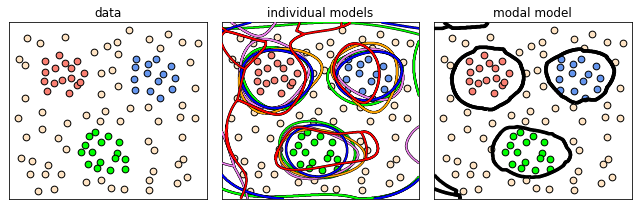

In [37]:
# This code cell will not be shown in the HTML version of this notebook
# load in dataset
csvname = datapath + '3eggs_multiclass.csv'

data = np.loadtxt(csvname,delimiter = ',')
x = data[:-1,:]
y = data[-1:,:] 

# run bagg
degree = 5
num_baggs = 5
train_portion = 0.66
runs = []
for j in range(num_baggs):
    # initialize with input/output data
    mylib7 = nonlib.reg_lib.super_setup.Setup(x,y)

    # perform preprocessing step(s) - especially input normalization
    mylib7.preprocessing_steps(name = 'standard')
    
    # pluck out indices of current training / validation sets
    mylib7.make_train_val_split(train_portion = train_portion)
    
    # loop over models to try
    for d in range(1,degree+1):
        # choose cost
        mylib7.choose_cost(name = 'multiclass_softmax')

        # choose dimensions of fully connected multilayer perceptron layers
        mylib7.choose_features(name = 'polys',degree = d,num_classifiers = 4)
        
        # fit an optimization
        mylib7.fit(algo = 'newtons_method',max_its = 5,verbose = False,lam = 10**(-6))
        
    # keep only the best degree, based on lowest validation cost
    val_costs = [np.min(mylib7.valid_count_histories[i]) for i in range(degree)]
    min_ind = np.argmin(val_costs)
    min_val = val_costs[min_ind]
    
    # get minor of minor
    smallest_ind = np.argmin(mylib7.valid_count_histories[min_ind])
    mylib7.train_cost_histories = mylib7.train_cost_histories[min_ind][smallest_ind]
    mylib7.valid_cost_histories = mylib7.valid_cost_histories[min_ind][smallest_ind]
    mylib7.train_count_histories = mylib7.train_count_histories[min_ind][smallest_ind]
    mylib7.valid_count_histories = mylib7.valid_count_histories[min_ind][smallest_ind]
    mylib7.weight_histories = mylib7.weight_histories[min_ind][smallest_ind]
    mylib7.choose_features(name = 'polys',degree = min_ind + 1)
        
    # store 
    runs.append(copy.deepcopy(mylib7))
    
# draw pics
demo = nonlib.multiclass_bagging_visualizers.Visualizer(csvname)
demo.show_baggs(runs)

# Exercise 11.9. K-fold cross-validation

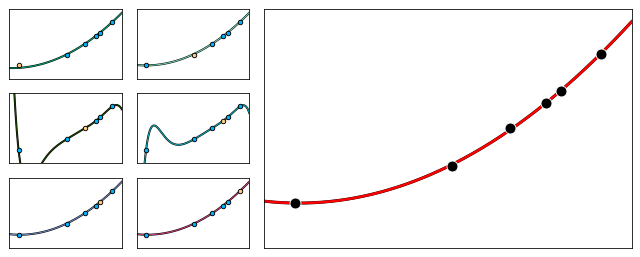

In [38]:
# import data
csvname_1 = datapath + 'galileo_ramp_data.csv'

data = np.loadtxt(csvname_1,delimiter = ',')
x = copy.deepcopy(data[:-1,:])
y = copy.deepcopy(data[-1:,:] )

### container for outer loop - contains best model per split ###
best_individual_models = []
best_degs = []
num_pts = np.size(y)
num_splits = num_pts
top_degree = 10
all_val_costs = []

### run inner loop - one split ###
for s in range(num_splits):
    #### outer loop - make a run over one split of the data ####
    runs = []
    w = 0
    for j in range(1,top_degree+1):
        # initialize with input/output data
        mylib8 = nonlib.reg_lib.super_setup.Setup(x,y)

        # perform preprocessing step(s) - especially input normalization
        mylib8.preprocessing_steps(normalizer = 'standard')
        
        # generate indices for training set
        train_inds = np.arange(num_pts)

        # remove validation index
        train_inds = np.delete(train_inds, s)
        valid_inds = np.array([s])

        # inject into input / output
        mylib8.train_inds = train_inds
        mylib8.x_train = mylib8.x[:,train_inds]
        mylib8.y_train = mylib8.y[:,train_inds]

        mylib8.valid_inds = valid_inds
        mylib8.x_valid = mylib8.x[:,valid_inds]
        mylib8.y_valid = mylib8.y[:,valid_inds]
 
        # choose cost
        mylib8.choose_cost(name = 'least_squares')

        # choose dimensions of fully connected multilayer perceptron layers
        mylib8.choose_features(name = 'polys',degree = j)

        # fit
        mylib8.fit(algo = 'newtons_method',max_its = 1,verbose = False)

        # add model to list
        runs.append(copy.deepcopy(mylib8))
        
    ### keep lowest validation model from this run ###
    val_costs = [runs[i].valid_cost_histories[0][1] for i in range(top_degree)]
    
    # determine best model
    min_ind = np.argmin(val_costs) 
    best_degs.append(min_ind+1)
    min_val = val_costs[min_ind]
    best_model = runs[min_ind]

    # store 
    best_individual_models.append(copy.deepcopy(best_model))
    all_val_costs.append(val_costs)
    
# determine best overall model
all_val_costs = np.array(all_val_costs)
all_val_costs = all_val_costs[:,:,0]
mean_val_costs = np.mean(all_val_costs,0)
ind = np.argmin(mean_val_costs) + 1

### retrain best overall model on entire dataset ####
# initialize with input/output data
mylib8 = nonlib.reg_lib.super_setup.Setup(x,y)

# perform preprocessing step(s) - especially input normalization
mylib8.preprocessing_steps(normalizer = 'standard')

# generate indices for training set
train_inds = np.arange(num_pts)

# inject into input / output
mylib8.train_inds = train_inds
mylib8.x_train = mylib8.x[:,train_inds]
mylib8.y_train = mylib8.y[:,train_inds]

mylib8.valid_inds = []
mylib8.x_valid = np.array([])
mylib8.y_valid = np.array([])

# choose cost
mylib8.choose_cost(name = 'least_squares')

# choose dimensions of fully connected multilayer perceptron layers
mylib8.choose_features(name = 'polys',degree = ind)

# fit
mylib8.fit(algo = 'newtons_method',max_its = 1,verbose = False)

# plot each model individually, as well as the median model
demo1 = nonlib.kfolds_regression_visualizers.Visualizer(csvname_1)
demo1.show_runs(best_individual_models,mylib8)

# Exercise 11.10. Classification of diabetes

In [176]:
import time
from IPython.display import clear_output

# function for assigning each point in a dataset to one of K folds
def assign_to_folds(L,K):
    # split data into k equal (as possible) sized sets
    order = np.random.permutation(L)
    c = np.ones((L,1))
    L = int(np.round((1/K)*L))
    for s in np.arange(0,K-2):
        c[order[s*L:(s+1)*L]] = s + 2
    c[order[(K-1)*L:]] = K
    return c

# load in dataset
csvname = datapath + 'new_gene_data.csv'
data = np.loadtxt(csvname,delimiter = ',')
x = data[:-1,:]
y = data[-1:,:] 

# assign data to K folds
K = 10
num_pts = y.size
fold_nums = assign_to_folds(num_pts,K)
lams = np.linspace(0,20,100)

# loop over each fold and complete calculations
all_train_counts = []
all_valid_counts = []
for k in range(K):
    print ('running '  + str(k+1) + ' of ' + str(K) + ' rounds')
    
    # import lib
    mylib = nonlib.kfolds_reg_lib.superlearn_setup.Setup(x,y)

    # choose normalizer
    mylib.choose_normalizer(name = 'standard')

    # make training testing split
    train_inds = np.argwhere(fold_nums != k)
    train_inds = [v[0] for v in train_inds]
    valid_inds = np.argwhere(fold_nums == k)
    valid_inds = [v[0] for v in valid_inds]

    # inject into input / output
    mylib.train_inds = train_inds
    mylib.x_train = mylib.x[:,train_inds]
    mylib.y_train = mylib.y[:,train_inds]

    mylib.valid_inds = valid_inds
    mylib.x_valid = mylib.x[:,valid_inds]
    mylib.y_valid = mylib.y[:,valid_inds]

    # choose cost
    mylib.choose_cost(cost_name = 'softmax',reg_name = 'L1')

    # choose optimizer
    mylib.choose_optimizer('gradient_descent',max_its=100,alpha_choice='diminishing')

    # run regularization
    mylib.tryout_lams(lams)
    
    # record counts
    all_train_counts.append(copy.deepcopy(mylib.train_count_vals))
    all_valid_counts.append(copy.deepcopy(mylib.valid_count_vals))

print ('runs complete!')
time.sleep(1.5)
clear_output()

# compute misclassifications totals
all_train_counts = np.array(all_train_counts)
train_totals = np.sum(all_train_counts,0)

all_valid_counts = np.array(all_valid_counts)
valid_totals = np.sum(all_valid_counts,0)

best_valid_ind = np.where(valid_totals == valid_totals.min())[0][-1]
best_lam = lams[best_valid_ind]

### re-tune weights given optimal regularization parameter found via 
### k-folds cross-validation
# import lib
mylib2 = nonlib.kfolds_reg_lib.superlearn_setup.Setup(x,y)

# choose normalizer
mylib2.choose_normalizer(name = 'standard')

# make training testing split
train_inds = np.argwhere(fold_nums != -1)
train_inds = [v[0] for v in train_inds]
valid_inds = np.argwhere(fold_nums == -1)
valid_inds = [v[0] for v in valid_inds]

# inject into input / output
mylib2.train_inds = train_inds
mylib2.x_train = mylib2.x[:,train_inds]
mylib2.y_train = mylib2.y[:,train_inds]

mylib2.valid_inds = valid_inds
mylib2.x_valid = mylib2.x[:,valid_inds]
mylib2.y_valid = mylib2.y[:,valid_inds]

# choose cost
mylib2.choose_cost(cost_name = 'softmax',reg_name = 'L1')

# choose optimizer
mylib2.choose_optimizer('gradient_descent',max_its=200,alpha_choice='diminishing')

# run regularization
mylib2.tryout_lams(np.array([best_lam]))

<IPython.core.display.Javascript object>


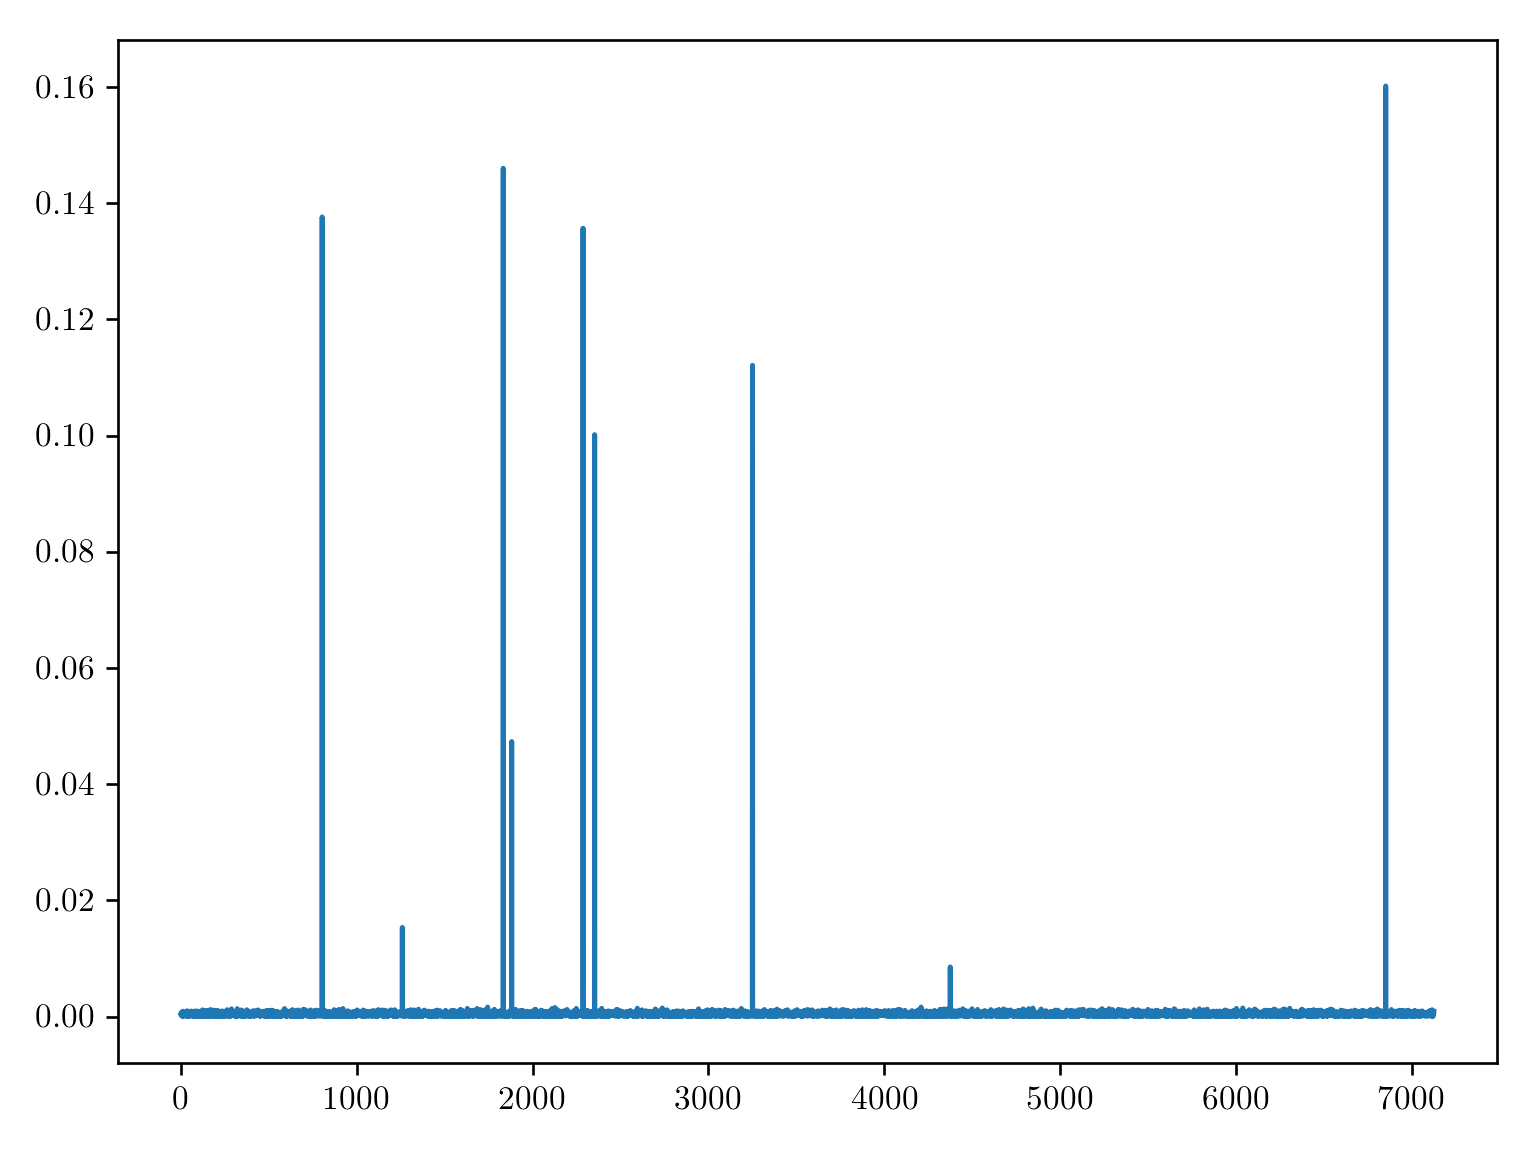

In [218]:
# plot best weights from cross-validated run
import matplotlib.pyplot as plt
plt.plot(np.abs(mylib2.best_weights[1:]))
plt.show()